### 1. Importing Libraries and Loading the Data

After the .csv file `games.csv` has been copied to the current directory, we can import the data as a Pandas DataFrame. As a DataFrame, we will be able to easily explore the type, amount, and distribution of data.  Furthermore, using a correlation matrix, we can explore the relationships between parameters. This is an important step in determining the type of machine learning algorithm to utilize. 

In [1]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Read in the data.
games = pandas.read_csv("games.csv")

In [3]:
# Print the names of the columns in games.
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


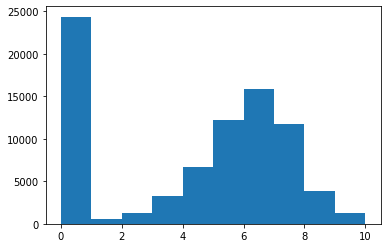

In [4]:
# Make a histogram of all the ratings in the average_rating column.
plt.hist(games["average_rating"])

# Show the plot.
plt.show()

In [5]:
# Print the first row of all the games with zero scores

# The .iloc method on dataframes allows us to index by position
print(games[games["average_rating"] == 0].iloc[0])

# Print the first row of all the games with scores greater than 0.
print(games[games["average_rating"] > 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

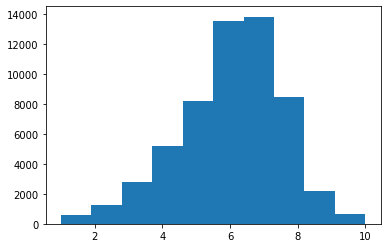

In [6]:
# Remove any rows without user reviews
games = games[games["users_rated"] > 0]

# Remove any rows with missing values
games = games.dropna(axis = 0)

# Make a histogram of all the ratings in the average_rating column
plt.hist(games["average_rating"])

# Show the plot
plt.show()

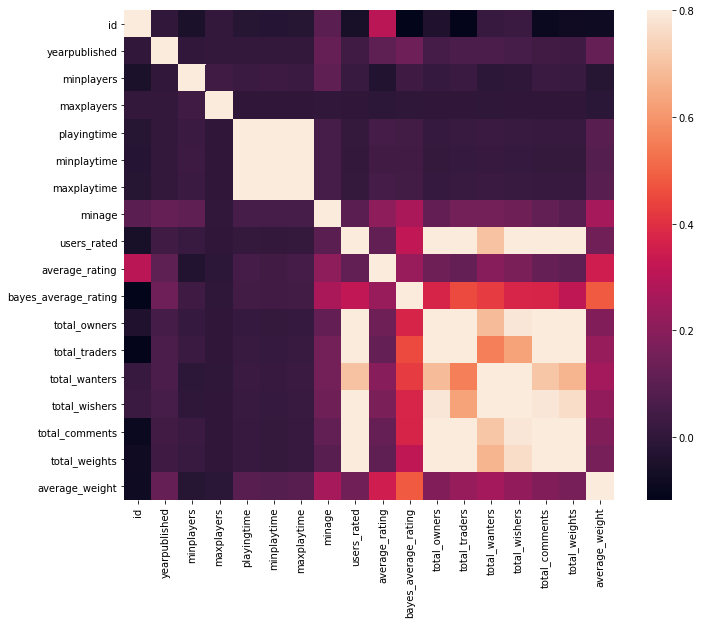

In [7]:
# Correlation matrix
corrmat = games.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True);
plt.show()

In [8]:
# Get all the columns from the dataframe
columns = games.columns.tolist()

# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["bayes_average_rating", "average_rating", "type", "name", "id"]]

# Store the variable we'll be predicting on
target = "average_rating"

### 2. Linear Regression

In the following cells, we will deploy a simple linear regression model to predict the average review of each board game.  We will use the mean squared error as a performance metric.  Furthermore, we will compare and contrast these results with the performance of an ensemble method. 

In [9]:
# Import a convenience function to split the sets
from sklearn.model_selection import train_test_split

# Generate the training set
# Set random_state to be able to replicate results
train = games.sample(frac = 0.8, random_state = 1)

# Select anything not in the training set and put it in the testing set
test = games.loc[~games.index.isin(train.index)]

# Print the shapes of both sets
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [10]:
# Import the linear regression model
from sklearn.linear_model import LinearRegression

# Initialize the model class
LR = LinearRegression()

# Fit the model to the training data
LR.fit(train[columns], train[target])

LinearRegression()

In [11]:
# Import the scikit-learn function to compute error
from sklearn.metrics import mean_squared_error

# Generate our predictions for the test set
predictions = LR.predict(test[columns])

# Compute error between our test predictions and the actual values
mean_squared_error(predictions, test[target])

2.078819032629323

In [12]:
# Import the random forest model
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with some parameters
RFR = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state = 1)

# Fit the model to the data
RFR.fit(train[columns], train[target])

RandomForestRegressor(min_samples_leaf=10, random_state=1)

In [13]:
# Make predictions
predictions = RFR.predict(test[columns])

# Compute the error
mean_squared_error(predictions, test[target])

1.4458560046071653

In [14]:
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [16]:
# Make predictions with both models
rating_LR = LR.predict(test[columns].iloc[0].values.reshape(1, -1))
rating_RFR = RFR.predict(test[columns].iloc[0].values.reshape(1, -1))

# Print out the predictions
print(rating_LR)
print(rating_RFR)

[8.12061283]
[7.91373581]


In [17]:
# Actual rating
test[target].iloc[0]

8.07933